## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

student_name = "Suyash Khand Thakuri"
student_id = "48198749"

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder  

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [126]:

file_path = r'C:\Users\suyas\Downloads\portfolio-part-2-Suyashthakuri\cleaned_ecommerce_dataset.csv'

df = pd.read_csv(file_path)

In [127]:
df.describe()

userId      timestamp       rating  helpfulness      item_id  \
count   2685.000000    2685.000000  2685.000000  2685.000000  2685.000000   
mean    4673.237616   58812.687151     3.705028     3.908007    43.478585   
std     3517.893437   37013.726118     1.346240     0.289069    26.630426   
min        4.000000   10100.000000     1.000000     3.000000     0.000000   
25%     1310.000000   22000.000000     3.000000     4.000000    21.000000   
50%     4666.000000   52800.000000     4.000000     4.000000    42.000000   
75%     7651.000000   91000.000000     5.000000     4.000000    67.000000   
max    10779.000000  123199.000000     5.000000     4.000000    88.000000   

        item_price    user_city  
count  2685.000000  2685.000000  
mean     83.091650    19.456983  
std      42.227558    11.397281  
min      12.000000     0.000000  
25%      49.000000     9.000000  
50%      73.650000    19.000000  
75%     129.820000    28.000000  
max     149.000000    39.000000

In [128]:
print(df.isnull().values.any())

False


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [129]:
# Using methods to have a rough picture about the data

In [130]:
df.head()

userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4  
1  Restaurants & Gourmet       74      108.30          4  
2  Restaurants & Gourmet       84       69.00          4  
3                 Movies       68      143.11          4  
4                 Movies        6      117.89          4

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [132]:
df.shape

(2685, 11)

In [133]:
df.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')

In [134]:
df.describe()

userId      timestamp       rating  helpfulness      item_id  \
count   2685.000000    2685.000000  2685.000000  2685.000000  2685.000000   
mean    4673.237616   58812.687151     3.705028     3.908007    43.478585   
std     3517.893437   37013.726118     1.346240     0.289069    26.630426   
min        4.000000   10100.000000     1.000000     3.000000     0.000000   
25%     1310.000000   22000.000000     3.000000     4.000000    21.000000   
50%     4666.000000   52800.000000     4.000000     4.000000    42.000000   
75%     7651.000000   91000.000000     5.000000     4.000000    67.000000   
max    10779.000000  123199.000000     5.000000     4.000000    88.000000   

        item_price    user_city  
count  2685.000000  2685.000000  
mean     83.091650    19.456983  
std      42.227558    11.397281  
min      12.000000     0.000000  
25%      49.000000     9.000000  
50%      73.650000    19.000000  
75%     129.820000    28.000000  
max     149.000000    39.000000

In [135]:
df.index

RangeIndex(start=0, stop=2685, step=1)

In [136]:
encode = OrdinalEncoder()
df["gender_code"] = encode.fit_transform(df[["gender"]])
df["category_code"] = encode.fit_transform(df[["category"]])
df["review_code"] = encode.fit_transform(df[["review"]])
df["item_code"] = encode.fit_transform(df[["item"]])

df[["review","review_code"]].head(30)


review  review_code
0                                   Not always McCrap       1618.0
1     I dropped the chalupa even before he told me to       1125.0
2                        The Wonderful World of Wendy       2185.0
3                                They actually did it       2243.0
4                                Hey! Gimme some pie!       1033.0
5                                     Good for sci-fi        925.0
6                                     Scary? you bet!       1854.0
7                         Fox - the 4th basic channel        795.0
8                                               Amen!        262.0
9                                           mama mia!       2643.0
10                         Let's go Furby hunting, Pa       1342.0
11                        Good Steak for a Good Value        913.0
12  Although very simple to use, it is powerful an...        250.0
13            Good service but  too many busy signals        929.0
14                                  decent quick food       2621.0
15                        good fast food with caution       2636.0
16                                     good fast food       2635.0
17                        food fast but service ain't       2631.0
18     Great deal for those who watch a LOT of movies        963.0
19             MTV has really gone downhill - part II       1382.0
20                   The Worst Decision You can Make.       2189.0
21                               America's Worst ISP.        264.0
22                 Cheat Codes - and How to use them!        544.0
23                            The Starter House Guide       2171.0
24                    Simbits - Tidbits for The Sims.       1906.0
25                           Lord of the Action Games       1360.0
26                                The Sims Wish List.       2159.0
27                        Diablo II Earns High Marks.        621.0
28                                    Absolutely #1!!        213.0
29                         It's halarious baby, YEAH!       1270.0

In [137]:
df.drop(columns=['review'], inplace=True)


C:\Users\suyas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


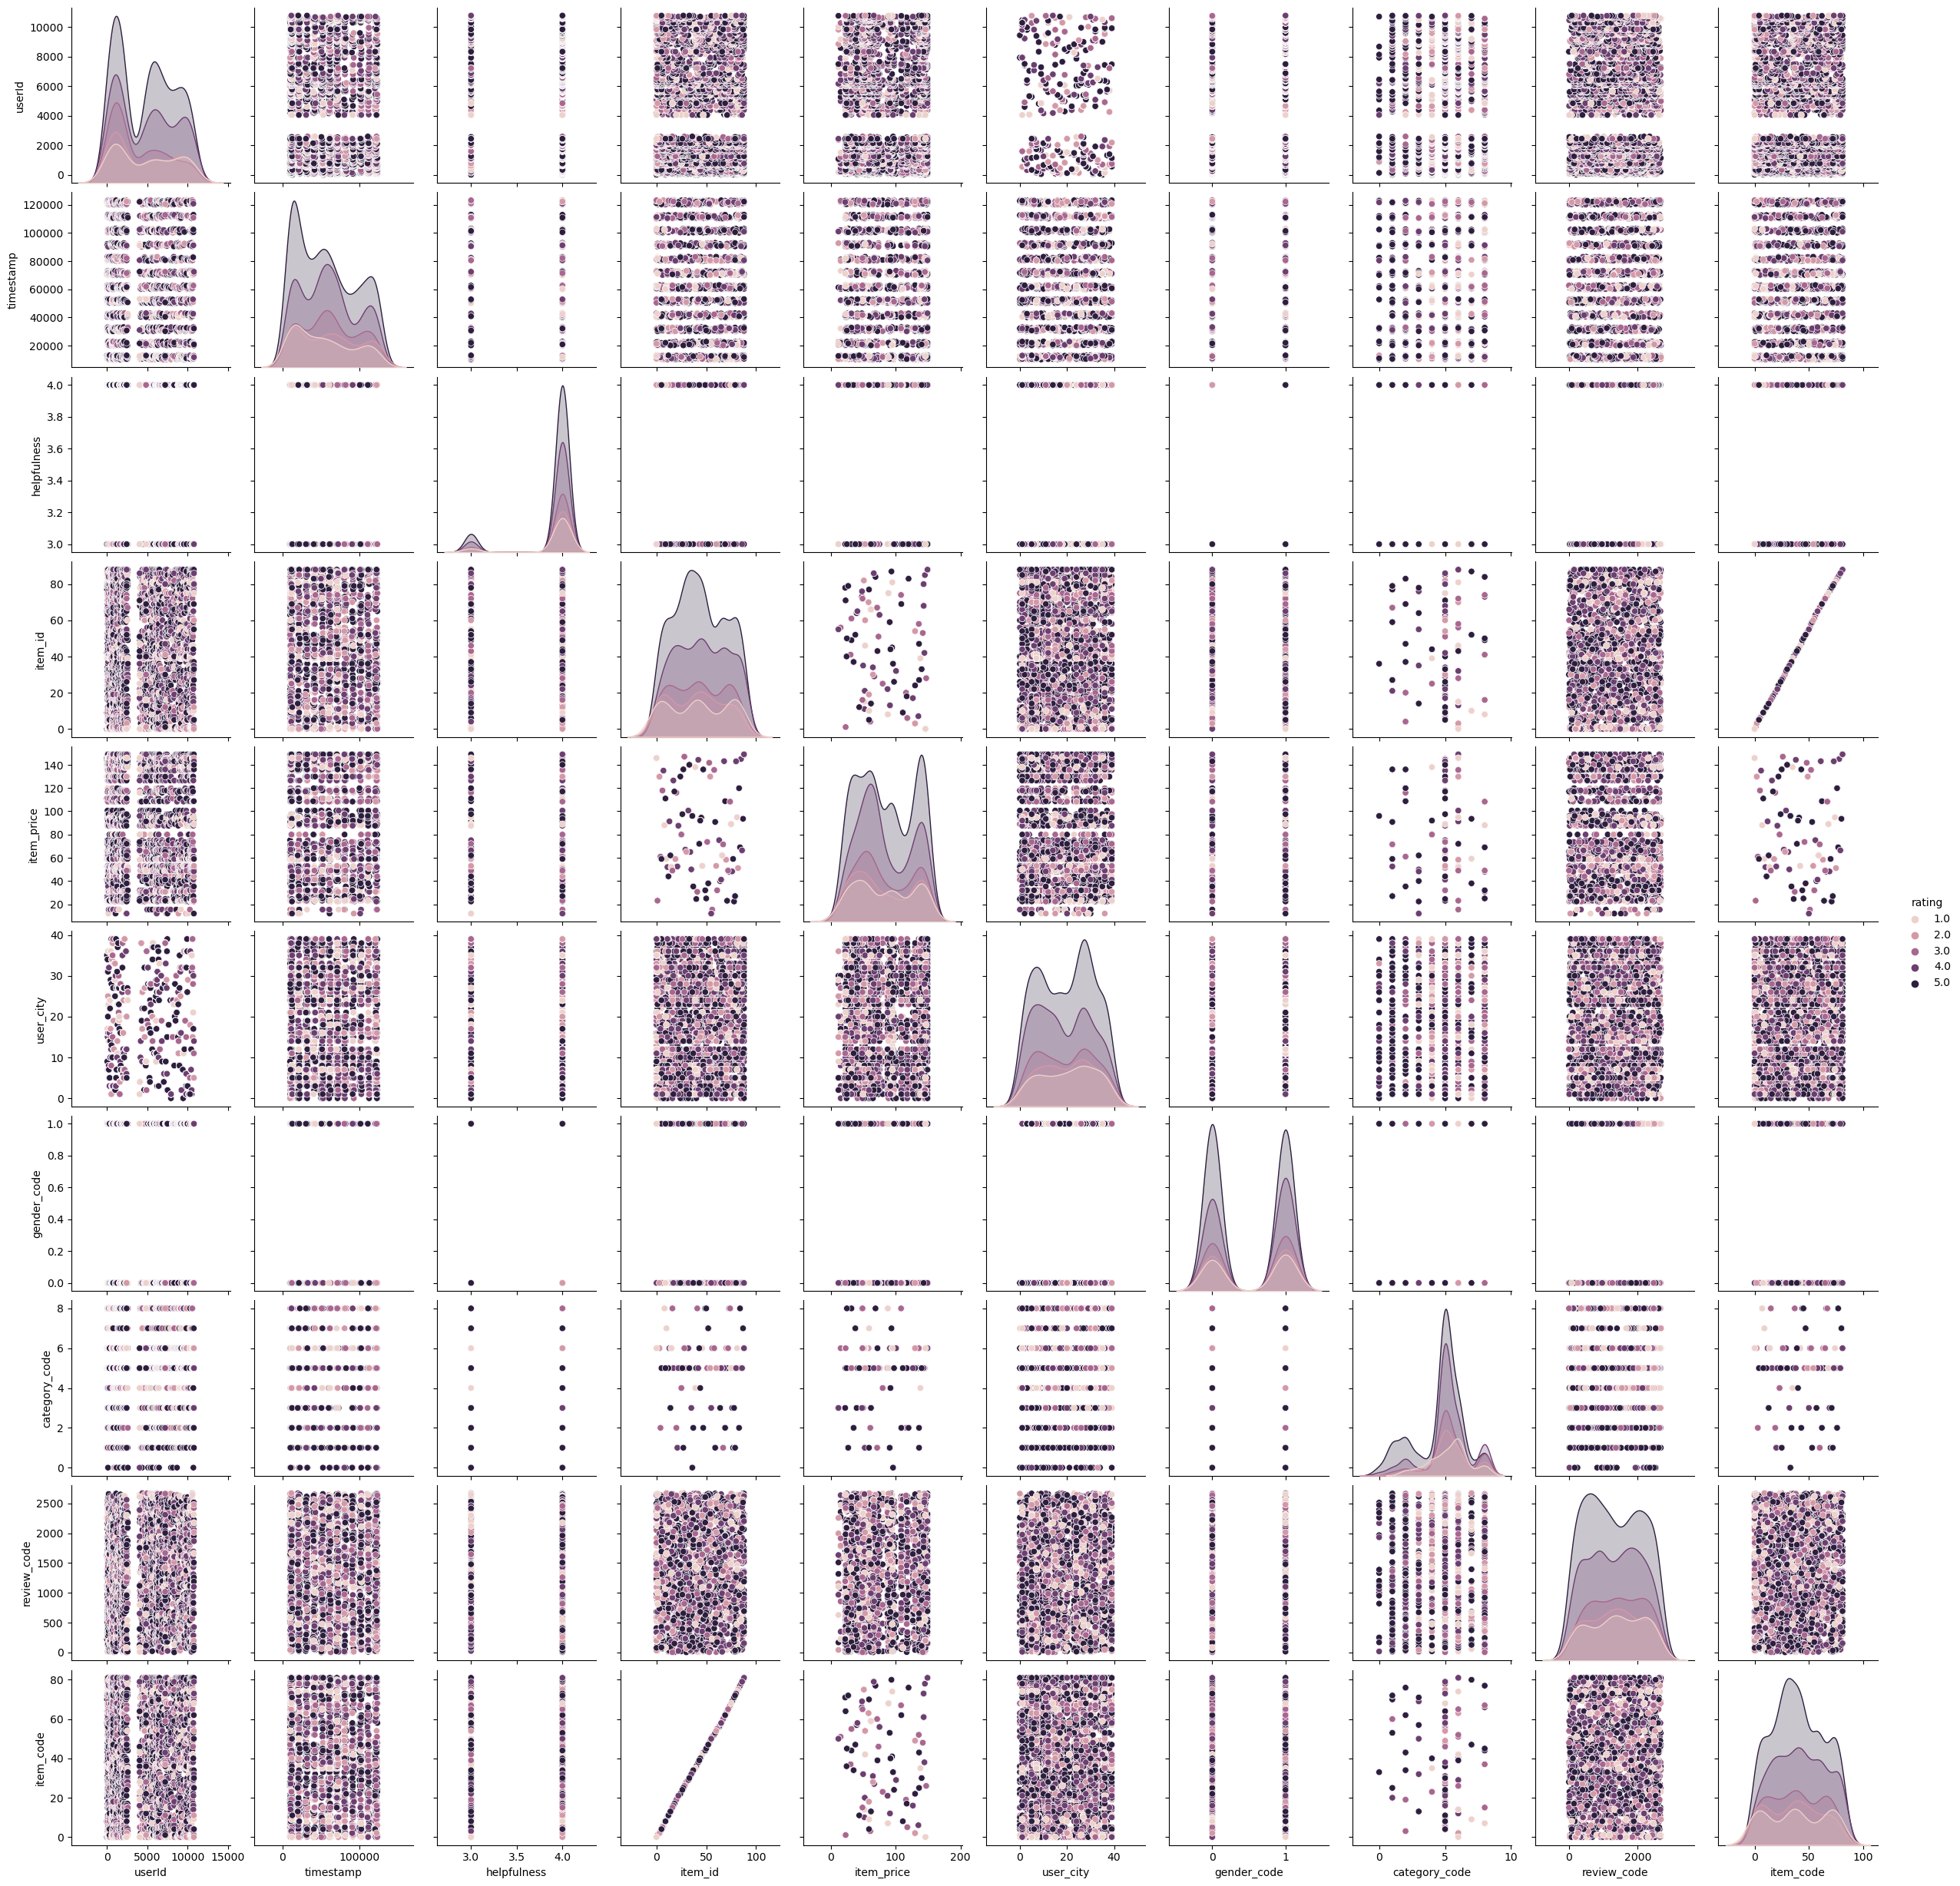

In [37]:
sns.pairplot(df,hue='rating')

In [138]:
df.head()

userId  timestamp                                item  rating  helpfulness  \
0    4081      71900                          McDonald's     4.0          3.0   
1    4081      72000                           Taco Bell     1.0          4.0   
2    4081      72000                             Wendy's     5.0          4.0   
3    4081     100399  South Park: Bigger, Longer & Uncut     5.0          3.0   
4    4081     100399                        American Pie     3.0          3.0   

  gender               category  item_id  item_price  user_city  gender_code  \
0      M  Restaurants & Gourmet       41       30.74          4          1.0   
1      M  Restaurants & Gourmet       74      108.30          4          1.0   
2      M  Restaurants & Gourmet       84       69.00          4          1.0   
3      M                 Movies       68      143.11          4          1.0   
4      M                 Movies        6      117.89          4          1.0   

   category_code  review_code  item_code  
0            8.0       1618.0       37.0  
1            8.0       1125.0       67.0  
2            8.0       2185.0       77.0  
3            5.0       2243.0       61.0  
4            5.0       1033.0        5.0

In [139]:
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['category'], inplace=True)
df.drop(columns=['item'], inplace=True)

In [140]:
df.head()

userId  timestamp  rating  helpfulness  item_id  item_price  user_city  \
0    4081      71900     4.0          3.0       41       30.74          4   
1    4081      72000     1.0          4.0       74      108.30          4   
2    4081      72000     5.0          4.0       84       69.00          4   
3    4081     100399     5.0          3.0       68      143.11          4   
4    4081     100399     3.0          3.0        6      117.89          4   

   gender_code  category_code  review_code  item_code  
0          1.0            8.0       1618.0       37.0  
1          1.0            8.0       1125.0       67.0  
2          1.0            8.0       2185.0       77.0  
3          1.0            5.0       2243.0       61.0  
4          1.0            5.0       1033.0        5.0

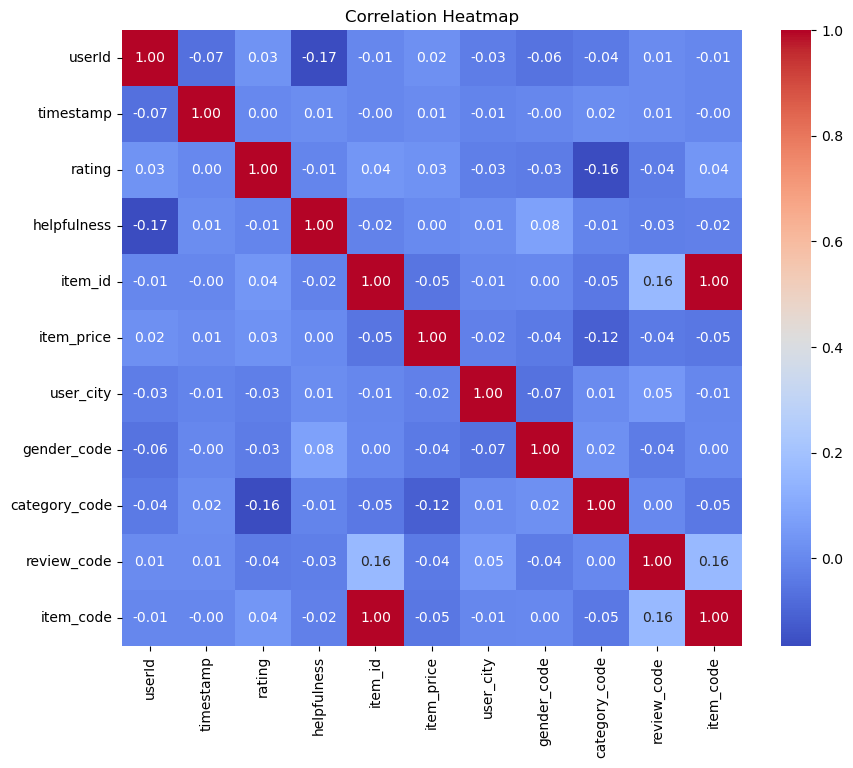

In [41]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [141]:
df.corr()

userId  timestamp    rating  helpfulness   item_id  \
userId         1.000000  -0.069176  0.032506    -0.166136 -0.005549   
timestamp     -0.069176   1.000000  0.000369     0.014179 -0.004452   
rating         0.032506   0.000369  1.000000    -0.007523  0.042890   
helpfulness   -0.166136   0.014179 -0.007523     1.000000 -0.019882   
item_id       -0.005549  -0.004452  0.042890    -0.019882  1.000000   
item_price     0.024576   0.010979  0.027374     0.004112 -0.054450   
user_city     -0.030031  -0.014934 -0.028825     0.012086 -0.005576   
gender_code   -0.058324  -0.003367 -0.034337     0.075947  0.002370   
category_code -0.041362   0.015009 -0.163158    -0.013408 -0.045268   
review_code    0.007139   0.007029 -0.036118    -0.028259  0.163544   
item_code     -0.005513  -0.003543  0.043388    -0.020433  0.999765   

               item_price  user_city  gender_code  category_code  review_code  \
userId           0.024576  -0.030031    -0.058324      -0.041362     0.007139   
timestamp        0.010979  -0.014934    -0.003367       0.015009     0.007029   
rating           0.027374  -0.028825    -0.034337      -0.163158    -0.036118   
helpfulness      0.004112   0.012086     0.075947      -0.013408    -0.028259   
item_id         -0.054450  -0.005576     0.002370      -0.045268     0.163544   
item_price       1.000000  -0.023427    -0.040596      -0.115571    -0.041421   
user_city       -0.023427   1.000000    -0.065638       0.008017     0.045626   
gender_code     -0.040596  -0.065638     1.000000       0.022549    -0.037884   
category_code   -0.115571   0.008017     0.022549       1.000000     0.001970   
review_code     -0.041421   0.045626    -0.037884       0.001970     1.000000   
item_code       -0.049885  -0.005220     0.001925      -0.045988     0.163090   

               item_code  
userId         -0.005513  
timestamp      -0.003543  
rating          0.043388  
helpfulness    -0.020433  
item_id         0.999765  
item_price     -0.049885  
user_city      -0.005220  
gender_code     0.001925  
category_code  -0.045988  
review_code     0.163090  
item_code       1.000000

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [143]:
#Case 1: training data containing 10% of the entire data.
train_case_1, test_case_1 = train_test_split(df, test_size=0.9, random_state=142)
print("Train case shape 2",train_case_1.shape)
print("Test case shape 2",test_case_1.shape)

Train case shape 2 (268, 11)
Test case shape 2 (2417, 11)


In [144]:
#Case 2: training data containing 90% of the entire data.
train_case_2, test_case_2 = train_test_split(df, test_size=0.1, random_state=142)
print("Train case shape 2",train_case_2.shape)
print("Test case shape 2",test_case_2.shape)

Train case shape 2 (2416, 11)
Test case shape 2 (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [145]:
#(model-a) using the training/testing data in case 1 with two most correlated input features

# Calculate the correlation matrix
train_case_1[['rating','helpfulness', 'gender_code', 'category_code', 'review_code']].corr()



rating  helpfulness  gender_code  category_code  review_code
rating         1.000000    -0.126040    -0.013494      -0.218482    -0.030088
helpfulness   -0.126040     1.000000     0.092542       0.011437    -0.051510
gender_code   -0.013494     0.092542     1.000000       0.088359    -0.071616
category_code -0.218482     0.011437     0.088359       1.000000     0.019433
review_code   -0.030088    -0.051510    -0.071616       0.019433     1.000000

In [146]:
#Most strong in train case 1 - First

reg = linear_model.LinearRegression()
X_case_1_strong_1 = train_case_1[['review_code', 'gender_code']]
y_case_1_strong_1 = train_case_1['rating']  
reg.fit(X_case_1_strong_1, y_case_1_strong_1)
print("y = x *", reg.coef_, "+", reg.intercept_)


y = x * [-5.44215524e-05 -4.29316570e-02] + 3.7549826939771522


In [84]:
#(model-b) using the training/testing data in case 1 with two least correlated input features

# Most weak in train case 1 - First

reg = linear_model.LinearRegression()
X_case_1_Least_1= train_case_1[['helpfulness','category_code']]
y_case_1_Least_1 = train_case_1[['rating']]
reg.fit(X_case_1_Least_1, y_case_1_Least_1)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[-0.58992282 -0.17181186]] + [6.84431991]


In [85]:
#(model-c) using the training/testing data in case 2 with two most correlated input features

# Calculate the correlation matrix
train_case_2[['rating','helpfulness', 'gender_code', 'category_code', 'review_code']].corr()


rating  helpfulness  gender_code  category_code  review_code
rating         1.000000     0.000205    -0.041948      -0.166337    -0.019409
helpfulness    0.000205     1.000000     0.071182      -0.013029    -0.030614
gender_code   -0.041948     0.071182     1.000000       0.019180    -0.031151
category_code -0.166337    -0.013029     0.019180       1.000000    -0.008150
review_code   -0.019409    -0.030614    -0.031151      -0.008150     1.000000

In [148]:

#Most strong in train case 2 - First

reg = linear_model.LinearRegression()
X_case_2_strong_1= train_case_2[['helpfulness','review_code']]
y_case_2_strong_1 = train_case_2[['rating']]
reg.fit(X_case_2_strong_1, y_case_2_strong_1)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[-1.82796448e-03 -3.38504002e-05]] + [3.75206907]


In [149]:
#(model-d) using the training/testing data in case 2 with two least correlated input features

#Most Least in train case 2 - First

reg = linear_model.LinearRegression()
X_case_2_least_1= train_case_2[['gender_code','category_code']]
y_case_2_least_1 = train_case_2['rating']
reg.fit(X_case_2_least_1, y_case_2_least_1)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.10448127 -0.12804241] + 4.395853201161024


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [150]:
#Evaluate the performance of the four models with two metrics, including MSE and Root MSE

#(a)(model-a) using the training/testing data in case 1

# Using the strong case 1

In [170]:
reg = linear_model.LinearRegression()
X_train_1_strong_1 = train_case_1[['review_code', 'gender_code']]
y_train_1_strong_1 = train_case_1['rating']  

X_test_1_strong_1 = test_case_1[['review_code', 'gender_code']]
y_test_1_strong_1 = test_case_1['rating'] 

In [171]:


reg.fit(X_case_1_strong_1, y_case_1_strong_1)

LinearRegression()

In [172]:
predicted = reg.predict(X_test_1_strong_1)
mse = round(((np.array(y_test_1_strong_1) - predicted)**2).sum()/len(y_test_1_strong_1),4)
rmse =np.sqrt(mse)
r_squared = r2_score(y_test_1_strong_1, predicted)

In [173]:
print("MSE",mse)
print("RMSE",rmse)
print("R Squared", r_squared)

MSE 1.8047
RMSE 1.3433912311757883
R Squared 0.0008760176513052942


In [174]:
#(b)(model-b) using the training/testing data in case 1

# Using the least case 1


In [175]:
reg = linear_model.LinearRegression()
X_train_1_Least_1 = train_case_1[['helpfulness', 'category_code']]
y_train_1_Least_1 = train_case_1['rating']  

X_test_1_Least_1 = test_case_1[['helpfulness', 'category_code']]
y_test_1_Least_1 = test_case_1['rating'] 

In [176]:
reg.fit(X_case_1_Least_1,y_case_1_Least_1)

LinearRegression()

In [177]:
predicted = reg.predict(X_test_1_Least_1)
mse = round(((np.array(y_test_1_Least_1) - predicted)**2).sum()/len(y_test_1_Least_1),4)
rmse =np.sqrt(mse)
r_squared = r2_score(y_test_1_Least_1, predicted)

In [178]:
print("MSE",mse)
print("RMSE",rmse)
print("R Squared", r_squared)

MSE 4654.5561
RMSE 68.22430725188786
R Squared 0.0028874101209555025


In [179]:
#(c)(model-c) using the training/testing data in case 2

# Using the strong case 2


In [180]:
reg = linear_model.LinearRegression()
X_train_2_strong_1 = train_case_2[['review_code','helpfulness']]
y_train_2_strong_1 = train_case_2['rating']  

X_test_2_strong_1 = test_case_2[['review_code','helpfulness']]
y_test_2_strong_1 = test_case_2['rating'] 

In [181]:
reg.fit(X_case_2_strong_1, y_case_2_strong_1)

LinearRegression()

In [188]:
predicted = reg.predict(X_test_2_Least_1)
mse = round(((np.array(y_test_2_Least_1) - predicted)**2).sum()/len(y_test_2_Least_1),4)
rmse =np.sqrt(mse)
r_squared = r2_score(y_test_2_Least_1, predicted)

In [189]:
print("MSE",mse)
print("RMSE",rmse)
print("R Squared", r_squared)

MSE 1.7797
RMSE 1.334053971921676
R Squared 0.010496027619494197


In [183]:
#(d)(model-d) using the training/testing data in case 2

# Using the least case 2



In [191]:
reg = linear_model.LinearRegression()
X_train_2_Least_1 = train_case_2[['gender_code','category_code']]
y_train_2_Least_1 = train_case_2['rating']  

X_test_2_Least_1 = test_case_2[['gender_code','category_code']]
y_test_2_Least_1 = test_case_2['rating'] 

In [192]:
reg.fit(X_case_2_least_1,y_case_2_least_1)



LinearRegression()

In [194]:
predicted = reg.predict(X_test_2_Least_1)
mse = round(((np.array(y_test_2_Least_1) - predicted)**2).sum()/len(y_test_2_Least_1),4)
rmse =np.sqrt(mse)
r_squared = r2_score(y_test_2_Least_1, predicted)

In [195]:
print("MSE",mse)
print("RMSE",rmse)
print("R Squared", r_squared)

MSE 1.7797
RMSE 1.334053971921676
R Squared 0.010496027619494197


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

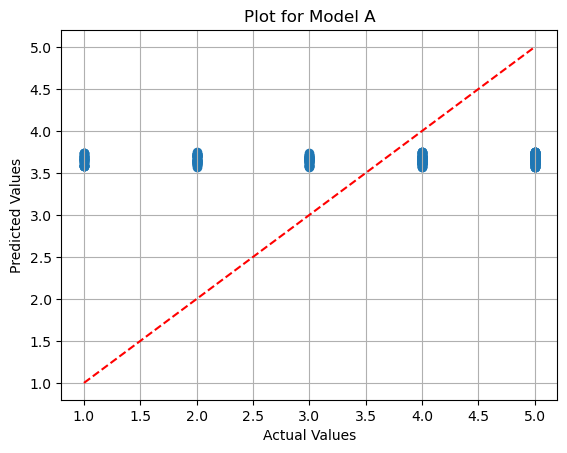

In [201]:

reg.fit(X_case_1_strong_1, y_case_1_strong_1)
predicted = reg.predict(X_case_1_strong_1)
plt.scatter(y_case_1_strong_1, predicted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Plot for Model A")
plt.grid(True)
plt.plot([y_case_1_strong_1.min(), y_case_1_strong_1.max()], [y_case_1_strong_1.min(), y_case_1_strong_1.max()], linestyle='--', color='red')
plt.show()


Analysis for Model A

The Mean Squared Error(MSE) is 1.81 suggesting that there is low difference between the predicted and actual values. RMSE is square root of mse and lies in the same direction of MSE where it deviates from the actual values .Similarly, R squared of 0.008 suggests that there is medium correlation between the predicted and the actual data. 

The Graph shows that the are in a single clusters and the model is performing well . Overall the model could work as a reasonable predictor.

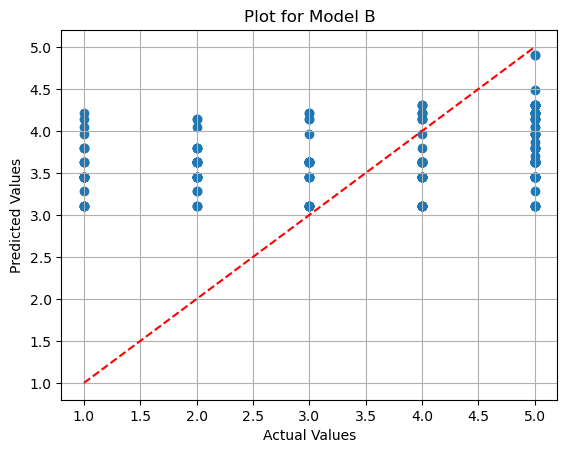

In [200]:
reg.fit(X_case_1_Least_1, y_case_1_Least_1)
predicted = reg.predict(X_case_1_Least_1)
plt.scatter(y_case_1_Least_1, predicted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Plot for Model B")
plt.grid(True)
plt.plot([y_case_1_Least_1.min(), y_case_1_Least_1.max()], [y_case_1_Least_1.min(), y_case_1_Least_1.max()], linestyle='--', color='red')
plt.show()


Analysis for Model B

For the model B high MSE and RMSE value combined with the low r squared value suggests that the model is not performing well. 

Similarly the scattered plots suggest that the model may not be well for predicting the values overall.The Graph shows that there is high error and weak correlation and the points are scattered with slight positive trend. As the scatter points are scattered there is room for improvement in the model.

Although the graph has plots scattered from the line , the points are in a positive trend. The data are also scattered and hence the model needs improvement.


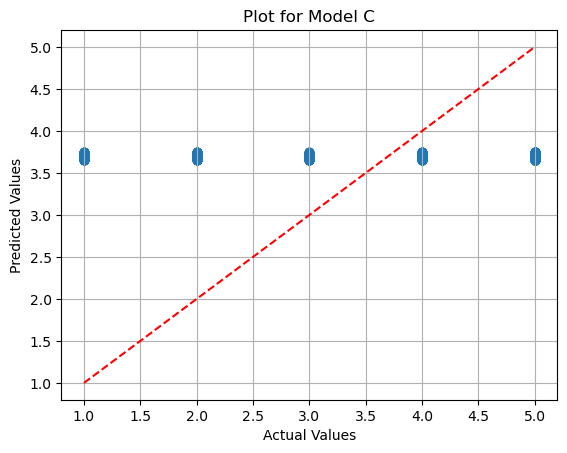

In [204]:
reg.fit(X_case_2_strong_1, y_case_2_strong_1)
predicted = reg.predict(X_case_2_strong_1)
plt.scatter(y_case_2_strong_1, predicted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Plot for Model C")
plt.grid(True)
plt.plot([y_case_2_strong_1.min(), y_case_2_strong_1.max()], [y_case_2_strong_1.min(), y_case_2_strong_1.max()], linestyle='--', color='red')
plt.show()


Analysis for Model C

Model C has relatively better MSE and RMSE 1.77 and RSE of 1.33 which shows low difference between predicted and actual values

The Graph shows that points are not scattered with slight positive trend. Overall the model could be worked as a reasonable predictor.

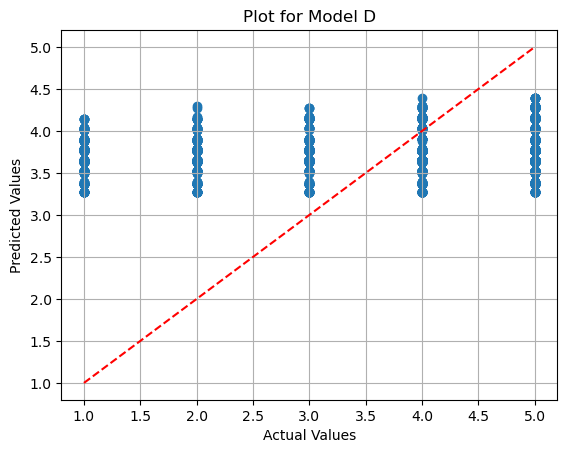

In [203]:
reg.fit(X_case_2_least_1, y_case_2_least_1)
predicted = reg.predict(X_case_2_least_1)
plt.scatter(y_case_2_least_1, predicted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Plot for Model D")
plt.grid(True)
plt.plot([y_case_2_least_1.min(), y_case_2_least_1.max()], [y_case_2_least_1.min(), y_case_2_least_1.max()], linestyle='--', color='red')
plt.show()


Analysis for Model D

Model has relatively low MSE and RMSE score compared to Model B and C and has stronger correlation than other models . The MSE of Model D is 1.7 and it has RMSE of 1.3 .Similarly Model D has r squared of 0.03.

Although the graph has plots scattered from the line , the points are in a positive trend. The data is somewhat scattered and hence could use improvements.

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


Data ethical principles highlights princpiles such as honesty and accuracy, clarity and simplicity, fairness and objectivity, respect for privacy and confidentiality and cultural sensitivity and inclusivity. 

In respect of the above infographics table though the table has been presented in a way that is appealing and easy to understand for the user and sorted first by total medal and then by gold medal, there can be concern about the data validity and reliability as proper source of the data has not been clarified were users can find the source of the data and check the validity. 

Another concern for the following infographics can be deception in fairness in regards to whether the medals were allocated towards the team sports or the medals have been won by individual atheletes .These could have deceptive implication towards the readers of the data as inconsistent aggregation can lead to misterpresentations.The above data can be criticized in terms of clarity as well as the data is not clear to understand and is somewhat distorted in terms of quality of the overall picture.

